In [104]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, Normalizer
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest 
from sklearn.feature_selection import chi2
from sklearn.neighbors import KNeighborsClassifier


In [86]:
df=pd.read_csv('../input/company-bankruptcy-prediction/data.csv')

In [87]:
df.head()


,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [88]:
df.columns

Index(['Bankrupt?', ' ROA(C) before interest and depreciation before interest',
       ' ROA(A) before interest and % after tax',
       ' ROA(B) before interest and depreciation after tax',
       ' Operating Gross Margin', ' Realized Sales Gross Margin',
       ' Operating Profit Rate', ' Pre-tax net Interest Rate',
       ' After-tax net Interest Rate',
       ' Non-industry income and expenditure/revenue',
       ' Continuous interest rate (after tax)', ' Operating Expense Rate',
       ' Research and development expense rate', ' Cash flow rate',
       ' Interest-bearing debt interest rate', ' Tax rate (A)',
       ' Net Value Per Share (B)', ' Net Value Per Share (A)',
       ' Net Value Per Share (C)', ' Persistent EPS in the Last Four Seasons',
       ' Cash Flow Per Share', ' Revenue Per Share (Yuan ¥)',
       ' Operating Profit Per Share (Yuan ¥)',
       ' Per Share Net profit before tax (Yuan ¥)',
       ' Realized Sales Gross Profit Growth Rate',
       ' Operating Profit

In [89]:
df.isnull().values.any()

False

# Feature Selection 

Univariate Selection

Statistical tests can be used to select those features that have the strongest relationship with the output variable.

The scikit-learn library provides the SelectKBest class that can be used with a suite of different statistical tests to select a specific number of features.

The example below uses the chi-squared (chi²) statistical test for non-negative features to select 10 of the best features from the Mobile Price Range Prediction Dataset.

In [90]:
X = df.iloc[:,1:]
y = df.iloc[:,0]
print(y.shape)
bf=SelectKBest(score_func=chi2, k=10)
fit=bf.fit(X,y)

dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

(6819,)
                                     Specs         Score
58                  Cash/Current Liability  2.901545e+11
75                  Fixed Assets to Assets  2.495621e+11
29                   Net Value Growth Rate  2.421293e+11
48         Fixed Assets Turnover Frequency  2.200229e+11
50                      Revenue per person  8.633138e+10
86               Total assets to GNP price  6.391313e+10
33                             Quick Ratio  3.059892e+10
71               Quick Asset Turnover Rate  2.391564e+10
28                 Total Asset Growth Rate  2.051825e+10
11   Research and development expense rate  1.385736e+10


In [91]:
u=df[['Bankrupt?',' Fixed Assets to Assets',' Cash/Current Liability',' Net Value Growth Rate',' Fixed Assets Turnover Frequency',' Revenue per person',' Total assets to GNP price',' Quick Ratio',' Quick Asset Turnover Rate',' Total Asset Growth Rate',' Research and development expense rate']]
dff=pd.DataFrame(u)
dff

,Bankrupt?,Fixed Assets to Assets,Cash/Current Liability,Net Value Growth Rate,Fixed Assets Turnover Frequency,Revenue per person,Total assets to GNP price,Quick Ratio,Quick Asset Turnover Rate,Total Asset Growth Rate,Research and development expense rate
0,1,0.424206,1.473360e-04,0.000327,1.165007e-04,0.034164,0.009219,0.001208,6.550000e+09,4.980000e+09,0.000000e+00
1,1,0.468828,1.383910e-03,0.000443,7.190000e+08,0.006889,0.008323,0.004039,7.700000e+09,6.110000e+09,0.000000e+00
2,1,0.276179,5.340000e+09,0.000396,2.650000e+09,0.028997,0.040003,0.005348,1.022676e-03,7.280000e+09,2.550000e+07
3,1,0.559144,1.010646e-03,0.000382,9.150000e+09,0.015463,0.003252,0.002896,6.050000e+09,4.880000e+09,0.000000e+00
4,1,0.309555,6.804636e-04,0.000439,2.935211e-04,0.058111,0.003878,0.003727,5.050000e+09,5.510000e+09,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...
6814,0,0.400338,5.071548e-03,0.000450,1.429781e-04,0.006348,0.000466,0.005457,1.244230e-04,7.070000e+09,4.500000e+09
6815,0,0.096136,4.727181e-03,0.000445,6.051982e-04,0.016083,0.001959,0.006741,1.173396e-04,5.220000e+09,1.440000e+09
6816,0,0.055509,8.821248e-02,0.000435,1.024298e-03,0.022097,0.002840,0.035112,1.749713e-04,5.990000e+09,1.039086e-04
6817,0,0.246805,7.133218e-03,0.000529,2.330013e-04,0.012749,0.002837,0.007256,1.351937e-04,7.250000e+09,2.510000e+09


In [92]:
#Analysis

# Target Variable 

<AxesSubplot:xlabel='Bankrupt?', ylabel='count'>

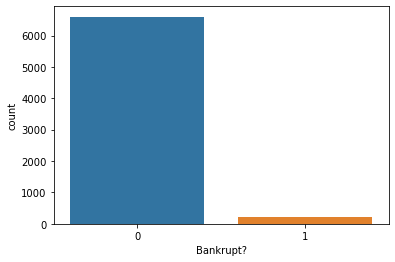

In [93]:
sns.countplot(data=dff,x='Bankrupt?')

In [94]:
x = dff.iloc[:,0].values.reshape(-1,1)
y=dff.iloc[:,1:].values

he Imbalanced classification problem is what we face when there is a severe skew in the class distribution of our training data. Okay, the skew may not be extremely severe (it can vary), but the reason we identify imbalanced classification as a problem is because it can influence the performance on our Machine Learning algorithms.

One way the imbalance may affect our Machine Learning algorithm is when our algorithm completely ignores the minority class. The reason this is an issue is because the minority class is often the class that we are most interested in. For instance, when building a classifier to classify fraudulent and non-fraudulent transactions from various observations, the data is likely to have more non-fraudulent transactions than that of fraud — I mean think about it, it would be very worrying if we had an equal amount of fraudulent transactions as non-fraud.

In [95]:
data_x=dff.iloc[:,0]

In [96]:
from collections import Counter 
print(Counter(data_x))

Counter({0: 6599, 1: 220})


# Random OverSampling

Random Oversampling includes selecting random examples from the minority class with replacement and supplementing the training data with multiple copies of this instance, hence it is possible that a single instance may be selected multiple times.

In [97]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler



over_sample=RandomOverSampler()
X_ros, y_ros=over_sample.fit_resample(y,x)
print(Counter(y_ros))


Counter({1: 6599, 0: 6599})


In [98]:
print(X_ros.shape)
print(y_ros.shape)

(13198, 10)
(13198,)


In [99]:
print(y_ros.reshape(-1,1).shape)

(13198, 1)


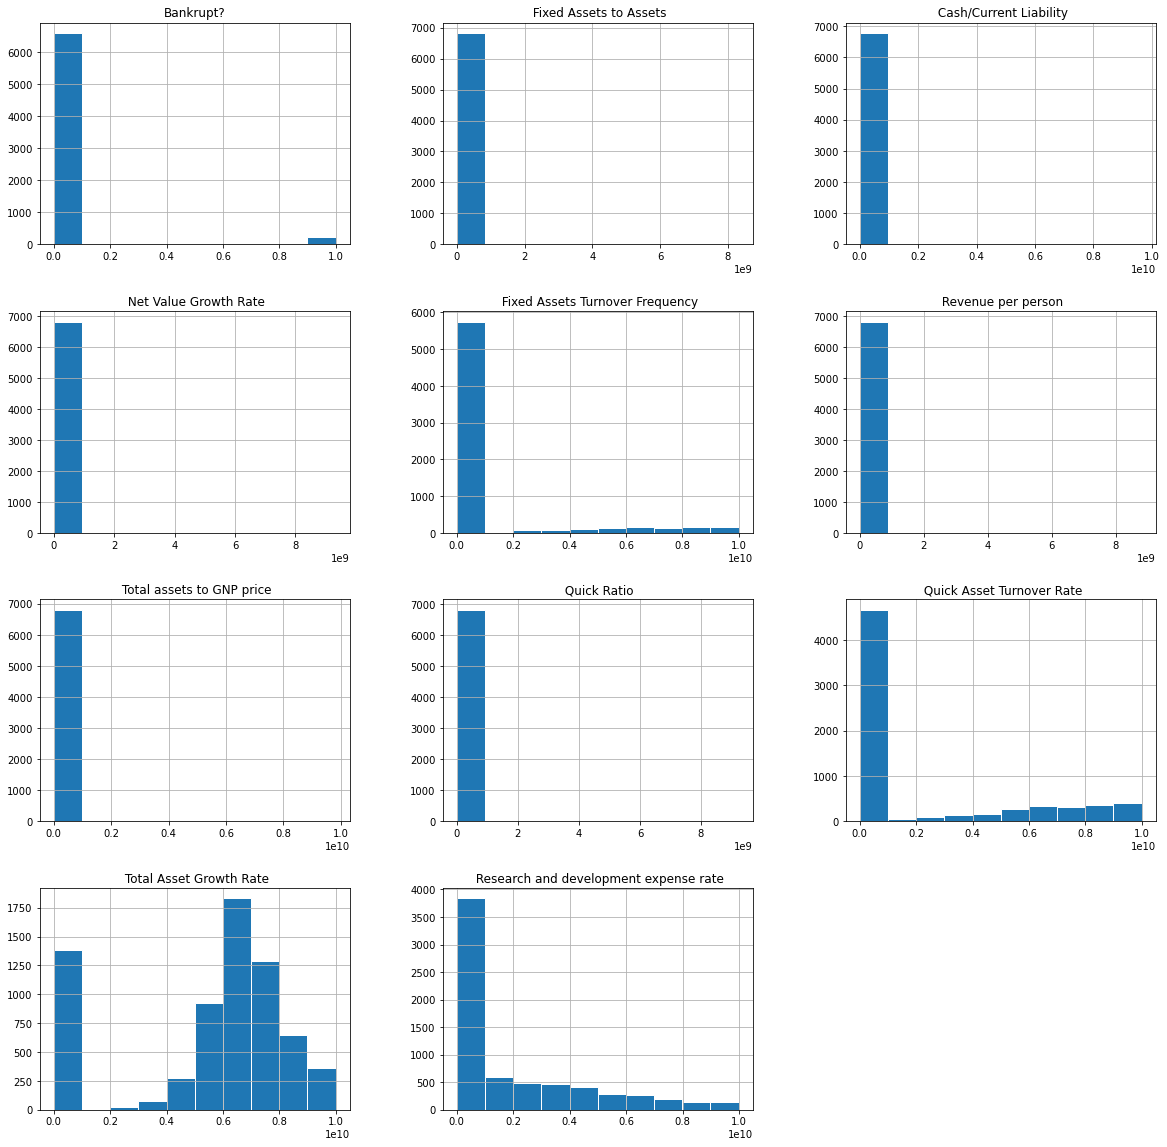

In [100]:
dff.hist(figsize=(20,20),edgecolor='white')
plt.show()

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X_ros, y_ros, random_state=76)

In [102]:
print(X_train.shape)
print(y_train.shape)

(9898, 10)
(9898,)


# Training KNN Model 

In [105]:
best_n = 0
best_training = 0
best_test = 0

for i in range(1,10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    
    training = knn.score(X_train, y_train)
    test = knn.score(X_test, y_test)
    
    if test > best_test:
        best_n = i
        best_training = training
        best_test = test

print("best number of neighbors: {}".format(best_n))
print("best training set score : {:.3f}".format(best_training))
print("best test set score: {:.3f}".format(best_test))

best number of neighbors: 1
best training set score : 1.000
best test set score: 0.981


I hope you understand this notebook . 
Please don't forget to upvote . It's boost the self confident and also motivate to more work on the kaggle platform . 
Feel free to give any kinds of suggestion . 


HAVE A NICE DAY ! 
Meet you in next weekend .